# Haberman's Survival Data Set 

#### Since I used a dataset that had multiple classes, so I chose a different (binary) dataset for this assignment.

### Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
### Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical)

## Class attribute:
-- Survival status(Binary) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [2]:
# Load the data
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
data = pd.read_csv(fileURL, names=['Age', 'YearOfSurgery', 'NumOfAxillaryNodes', 'Class'], header=None)

In [3]:
data.head(10)

,Age,YearOfSurgery,NumOfAxillaryNodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# split the data to train and test

from sklearn.cross_validation import train_test_split

X = data.as_matrix(['Age','YearOfSurgery','NumOfAxillaryNodes'])
Y = data['Class'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [5]:
# Create the visualization of tree

from sklearn import tree

Y = data.as_matrix(['Class'])

X_train = X[:245]
Y_train = Y[:245]

X_test = X[245:]
Y_test = Y[245:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [21]:
from sklearn import preprocessing
from IPython.display import Image
with open("tree_image.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file= f,
                     feature_names=['Age','YearOfSurgery','NumOfAxillaryNodes'],
                     class_names=['Survived','Died'],
                     filled=True, rounded=True)

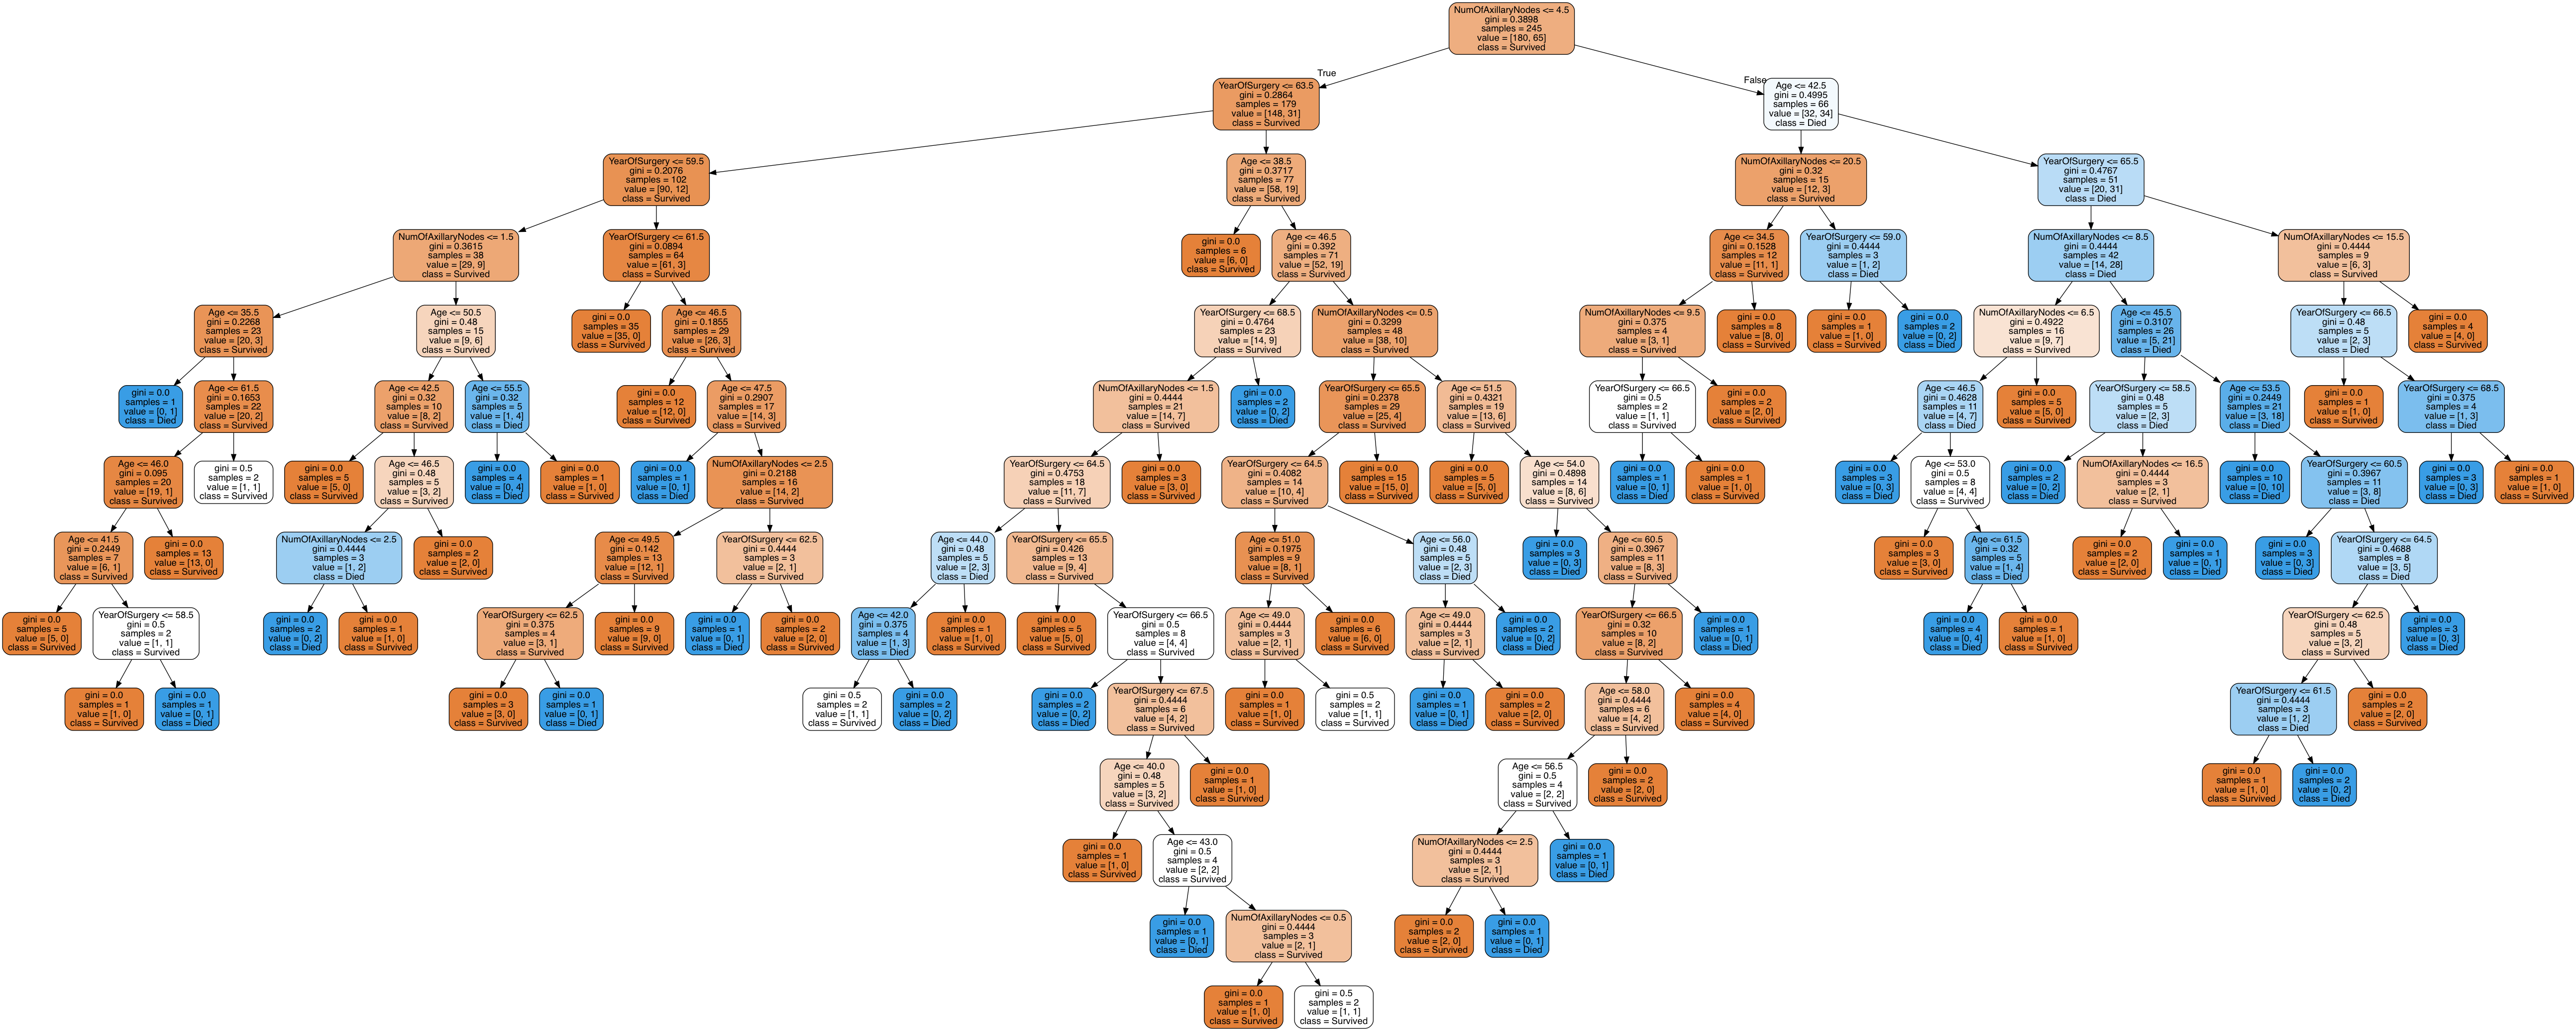

In [23]:
import pydotplus
graph = pydotplus.graph_from_dot_data(open('tree_image.dot').read()) 
Image(graph.create_png())

# 1.The accuracy of your model on the test data

In [6]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)
Y_pred_proba = Y_pred_proba[:,0]

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.68852459016393441

As we can see from result that the accuracy is around 0.69. This is a good accurancy since we know that the accuracy is better if the number is closer to 1. Out of hundred cases, there is 69 cases that the model predicted correctly about their class.

# 2.The precision and recall values

In [43]:
from sklearn.metrics import precision_score
# DecisionTree precision
precision_score(Y_test, Y_pred)

0.77083333333333337

In [44]:
from sklearn.metrics import recall_score
# DecisionTree recall
recall_score(Y_test, Y_pred)

0.82222222222222219

    Precision in this data set describes the the proportion of instances classified as survived that actually survived 5 years or longer. Recall in this data set describes the proportion of instances that should have been labeled as survived that actually were labeled as such.
    Precision = TP/(TP + FP) = 37/(37 + 11) = 0.77
    Recall = TP/(TP + FN) = 37/(37 + 8) = 0.82
    And as precision increses, the false positives which in this case is we labled as died but actually survived instances will decrease. 
    Also as recall increases, the false negatives (FN) in this case is instance that we labled survived but actrally did not will decrease, too. 
    In this case, we care more about the recall value and we want to recall value to be high, because we want the false positive value to be really low. Since if a patient actually might die in 5 years but we labled as survive in 5 years. Then we might not provided enough or correct treatment to the patient.

# 3.A classification report

In [45]:
from sklearn.metrics import classification_report

target_names = ['Survived', 'Died']
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

   Survived       0.77      0.82      0.80        45
       Died       0.38      0.31      0.34        16

avg / total       0.67      0.69      0.68        61



The classification report gives a table of the matricis used for evaluating the classifier. 
From table we can see that the precision, recall and f1-score is fairly good overall.The f1 score is a weighted average of precesion and recall measurement. While f1 on its own provides a good amount of information when evaluating a model, it can’t simply be used in place for all other metrics. Since all of the score are above 50%, we can see that the model is better than the random predictions. Also as we know that in medical world, there is always miracles and unexpectations happening, so in my oponion, this is a fairly good modle. 

# 4.The confusion matrix for this experiment

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred, labels=[1,2])

array([[37,  8],
       [11,  5]])

From the confusion matrix above, we know tht the TP = 37, FN = 8, FP = 11 and TN = 5. Hence there is 42 instances out of 61 instances were correctly predicted. The true positive rate is 82%. So the model predicted 82% people right about they can survive more than 5 years. While we look at the negative instances, it is not a very good prediction. We only predicted 5 out of 16 instances right. Since there are lower number of total negative instances, even though the accuracy: (TP + TN) / (TP + TN + FP + FN) is approximately 69%, it is not a very reliable matric to evaluate the classifier.

# 5.An ROC curve

Populating the interactive namespace from numpy and matplotlib


/Users/jialiu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


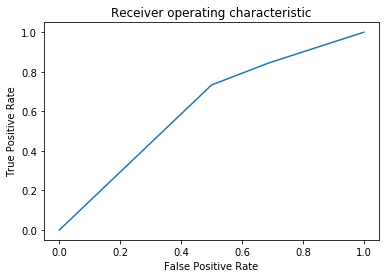

In [8]:
%pylab inline
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_proba,pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC curve plots TP (on the y-axis) against FP (on the x-axis).Point on the top left corner of the plot is ideal that false positive is 0, and true positive is 1. We can see the ROC curve for DecisionTree is slightly above the line of discrimination(random guess). 

# 6.A Precision/Recall curve

/Users/jialiu/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


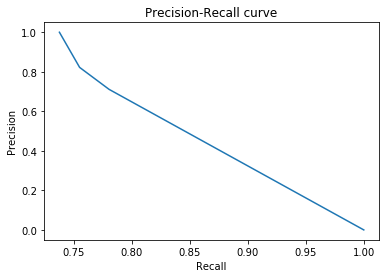

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_proba, pos_label= 1)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

A precision/recall curve plots Precision (on the y-axis) against Recall (on the x-axis).According to description of Precision/Recall curve, A model with high recall and low precision is worse. A model with high precision and low recall is better. A model with high precision and high recall is ideal. So I think the model in this case is not a very good model.